In [9]:
import os
import calendar
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()
sns.set_theme(style="darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



months = list(calendar.month_name)
months.remove('')

HOME_DIR = os.getenv('HOME_DIR')

In [89]:
data = pd.read_csv(HOME_DIR + '/data/hrly_Irish_weather.csv')

/var/folders/nh/3lqdccbj6xs486_7mggtk6mc0000gn/T/ipykernel_68103/1293769021.py:1: DtypeWarning:

Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748225 entries, 0 to 748224
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   county     748225 non-null  object 
 1   station    748225 non-null  object 
 2   latitude   748225 non-null  float64
 3   longitude  748225 non-null  float64
 4   date       748225 non-null  object 
 5   rain       748225 non-null  object 
 6   temp       748225 non-null  object 
 7   wetb       748225 non-null  object 
 8   dewpt      748225 non-null  object 
 9   vappr      748225 non-null  object 
 10  rhum       748225 non-null  object 
 11  msl        748225 non-null  object 
 12  wdsp       688367 non-null  object 
 13  wddir      688367 non-null  object 
 14  sun        239432 non-null  object 
 15  vis        239432 non-null  object 
 16  clht       239432 non-null  object 
 17  clamt      239432 non-null  object 
dtypes: float64(2), object(16)
memory usage: 102.8+ MB


In [87]:
def clean_data(df):
    return (df.assign(date=lambda d: d['date'].astype('datetime64[ns]'),
            county=lambda d: d['county'].astype('string'),
            station=lambda d: d['station'].astype('string')
                      .replace('SherkinIsland', 'Sherkin Island')
                      .str.title(),
                      latitude=lambda d: d['latitude'].astype('float32'),
                      longitude=lambda d: d['longitude'].astype('float32'))
            .set_index(['date', 'station', 'county', 'latitude', 'longitude'])
            .replace(' ', np.nan)
            .assign(rain=lambda d: d['rain'].astype('float32'),
                    temp=lambda d: d['temp'].astype('float32'),
                    wetb=lambda d: d['wetb'].astype('float32'),
                    dewpt=lambda d: d['dewpt'].astype('float32'),
                    vappr=lambda d: d['vappr'].astype('float32'),
                    rhum=lambda d: d['rhum'].astype('float32'),
                    msl=lambda d: d['msl'].astype('float32'),
                    wdsp=lambda d: d['wdsp'].astype('float32'),
                    wddir=lambda d: d['wddir'].astype('float32')
                    )
            .drop(['sun', 'vis', 'clht', 'clamt'], axis=1)
            .interpolate()
            .reset_index(level=['station', 'county', 'latitude', 'longitude'])
            .assign(date=lambda d:d.index.day,
                    month=lambda d: d.index.month_name(locale='en_us'),
                    year=lambda d: d.index.year,
                    year_month=lambda d: d.index.strftime('%Y-%m')
                   ))


In [90]:
data = clean_data(data)

In [14]:
data.head()

,station,county,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month,year,year_month
date,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,Athenry,Galway,53.289001,-8.786,0.0,5.2,4.5,3.6,7.9,89.0,1021.900024,8.0,320.0,January,2017,2017-01
2017-01-01 01:00:00,Athenry,Galway,53.289001,-8.786,0.0,4.7,4.1,3.1,7.6,89.0,1022.000000,9.0,320.0,January,2017,2017-01
2017-01-01 02:00:00,Athenry,Galway,53.289001,-8.786,0.0,4.2,3.6,2.7,7.4,90.0,1022.099976,8.0,320.0,January,2017,2017-01
2017-01-01 03:00:00,Athenry,Galway,53.289001,-8.786,0.1,3.5,2.8,1.6,6.9,87.0,1022.500000,9.0,330.0,January,2017,2017-01
2017-01-01 04:00:00,Athenry,Galway,53.289001,-8.786,0.1,3.2,2.6,1.6,6.8,89.0,1022.700012,8.0,330.0,January,2017,2017-01


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748225 entries, 2017-01-01 00:00:00 to 2020-06-01 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   station     748225 non-null  string 
 1   county      748225 non-null  string 
 2   latitude    748225 non-null  float64
 3   longitude   748225 non-null  float64
 4   rain        748225 non-null  float32
 5   temp        748225 non-null  float32
 6   wetb        748225 non-null  float32
 7   dewpt       748225 non-null  float32
 8   vappr       748225 non-null  float32
 9   rhum        748225 non-null  float32
 10  msl         748225 non-null  float32
 11  wdsp        748225 non-null  float32
 12  wddir       748225 non-null  float32
 13  month       748225 non-null  object 
 14  year        748225 non-null  int64  
 15  year_month  748225 non-null  object 
dtypes: float32(9), float64(2), int64(1), object(2), string(2)
memory usage: 71.4+ MB


In [16]:
data.describe()

,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,year
count,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000,748225.000000
mean,53.258880,-8.138360,0.126212,9.950746,8.533941,7.001336,10.417602,82.604095,1013.129700,9.338195,207.344833,2018.243844
std,0.929118,1.187398,0.470528,4.713271,4.353204,4.380149,3.075344,12.145458,12.739209,5.683887,83.257111,1.006784
min,51.476002,-10.241000,0.000000,-6.900000,-49.900002,-14.600000,2.000000,20.000000,956.599976,0.000000,0.000000,2017.000000
25%,52.689999,-8.918000,0.000000,6.700000,5.600000,3.800000,8.000000,75.000000,1005.099976,5.000000,150.000000,2017.000000
50%,53.363998,-8.244000,0.000000,9.900000,8.700000,7.200000,10.100000,85.000000,1014.599976,8.000000,220.000000,2018.000000
75%,53.905998,-7.310000,0.000000,13.200000,11.600000,10.200000,12.400000,92.000000,1021.799988,12.000000,270.000000,2019.000000
max,55.372002,-6.241000,34.000000,31.500000,23.799999,22.500000,27.200001,100.000000,1051.199951,59.000000,360.000000,2020.000000


In [17]:
data['station'].value_counts()

Athenry                 29929
Ballyhaise              29929
Belmullet               29929
Casement                29929
Claremorris             29929
Cork Airport            29929
Dublin Airport          29929
Dunsany                 29929
Finner                  29929
Gurteen                 29929
Johnstownii             29929
Knock Airport           29929
Mace Head               29929
Malin Head              29929
Markree                 29929
Moore Park              29929
Mt Dillon               29929
Mullingar               29929
Newport                 29929
Oak Park                29929
Phoenix Park            29929
Roches Point            29929
Shannon Airport         29929
Sherkin Island          29929
Valentia Observatory    29929
Name: station, dtype: Int64

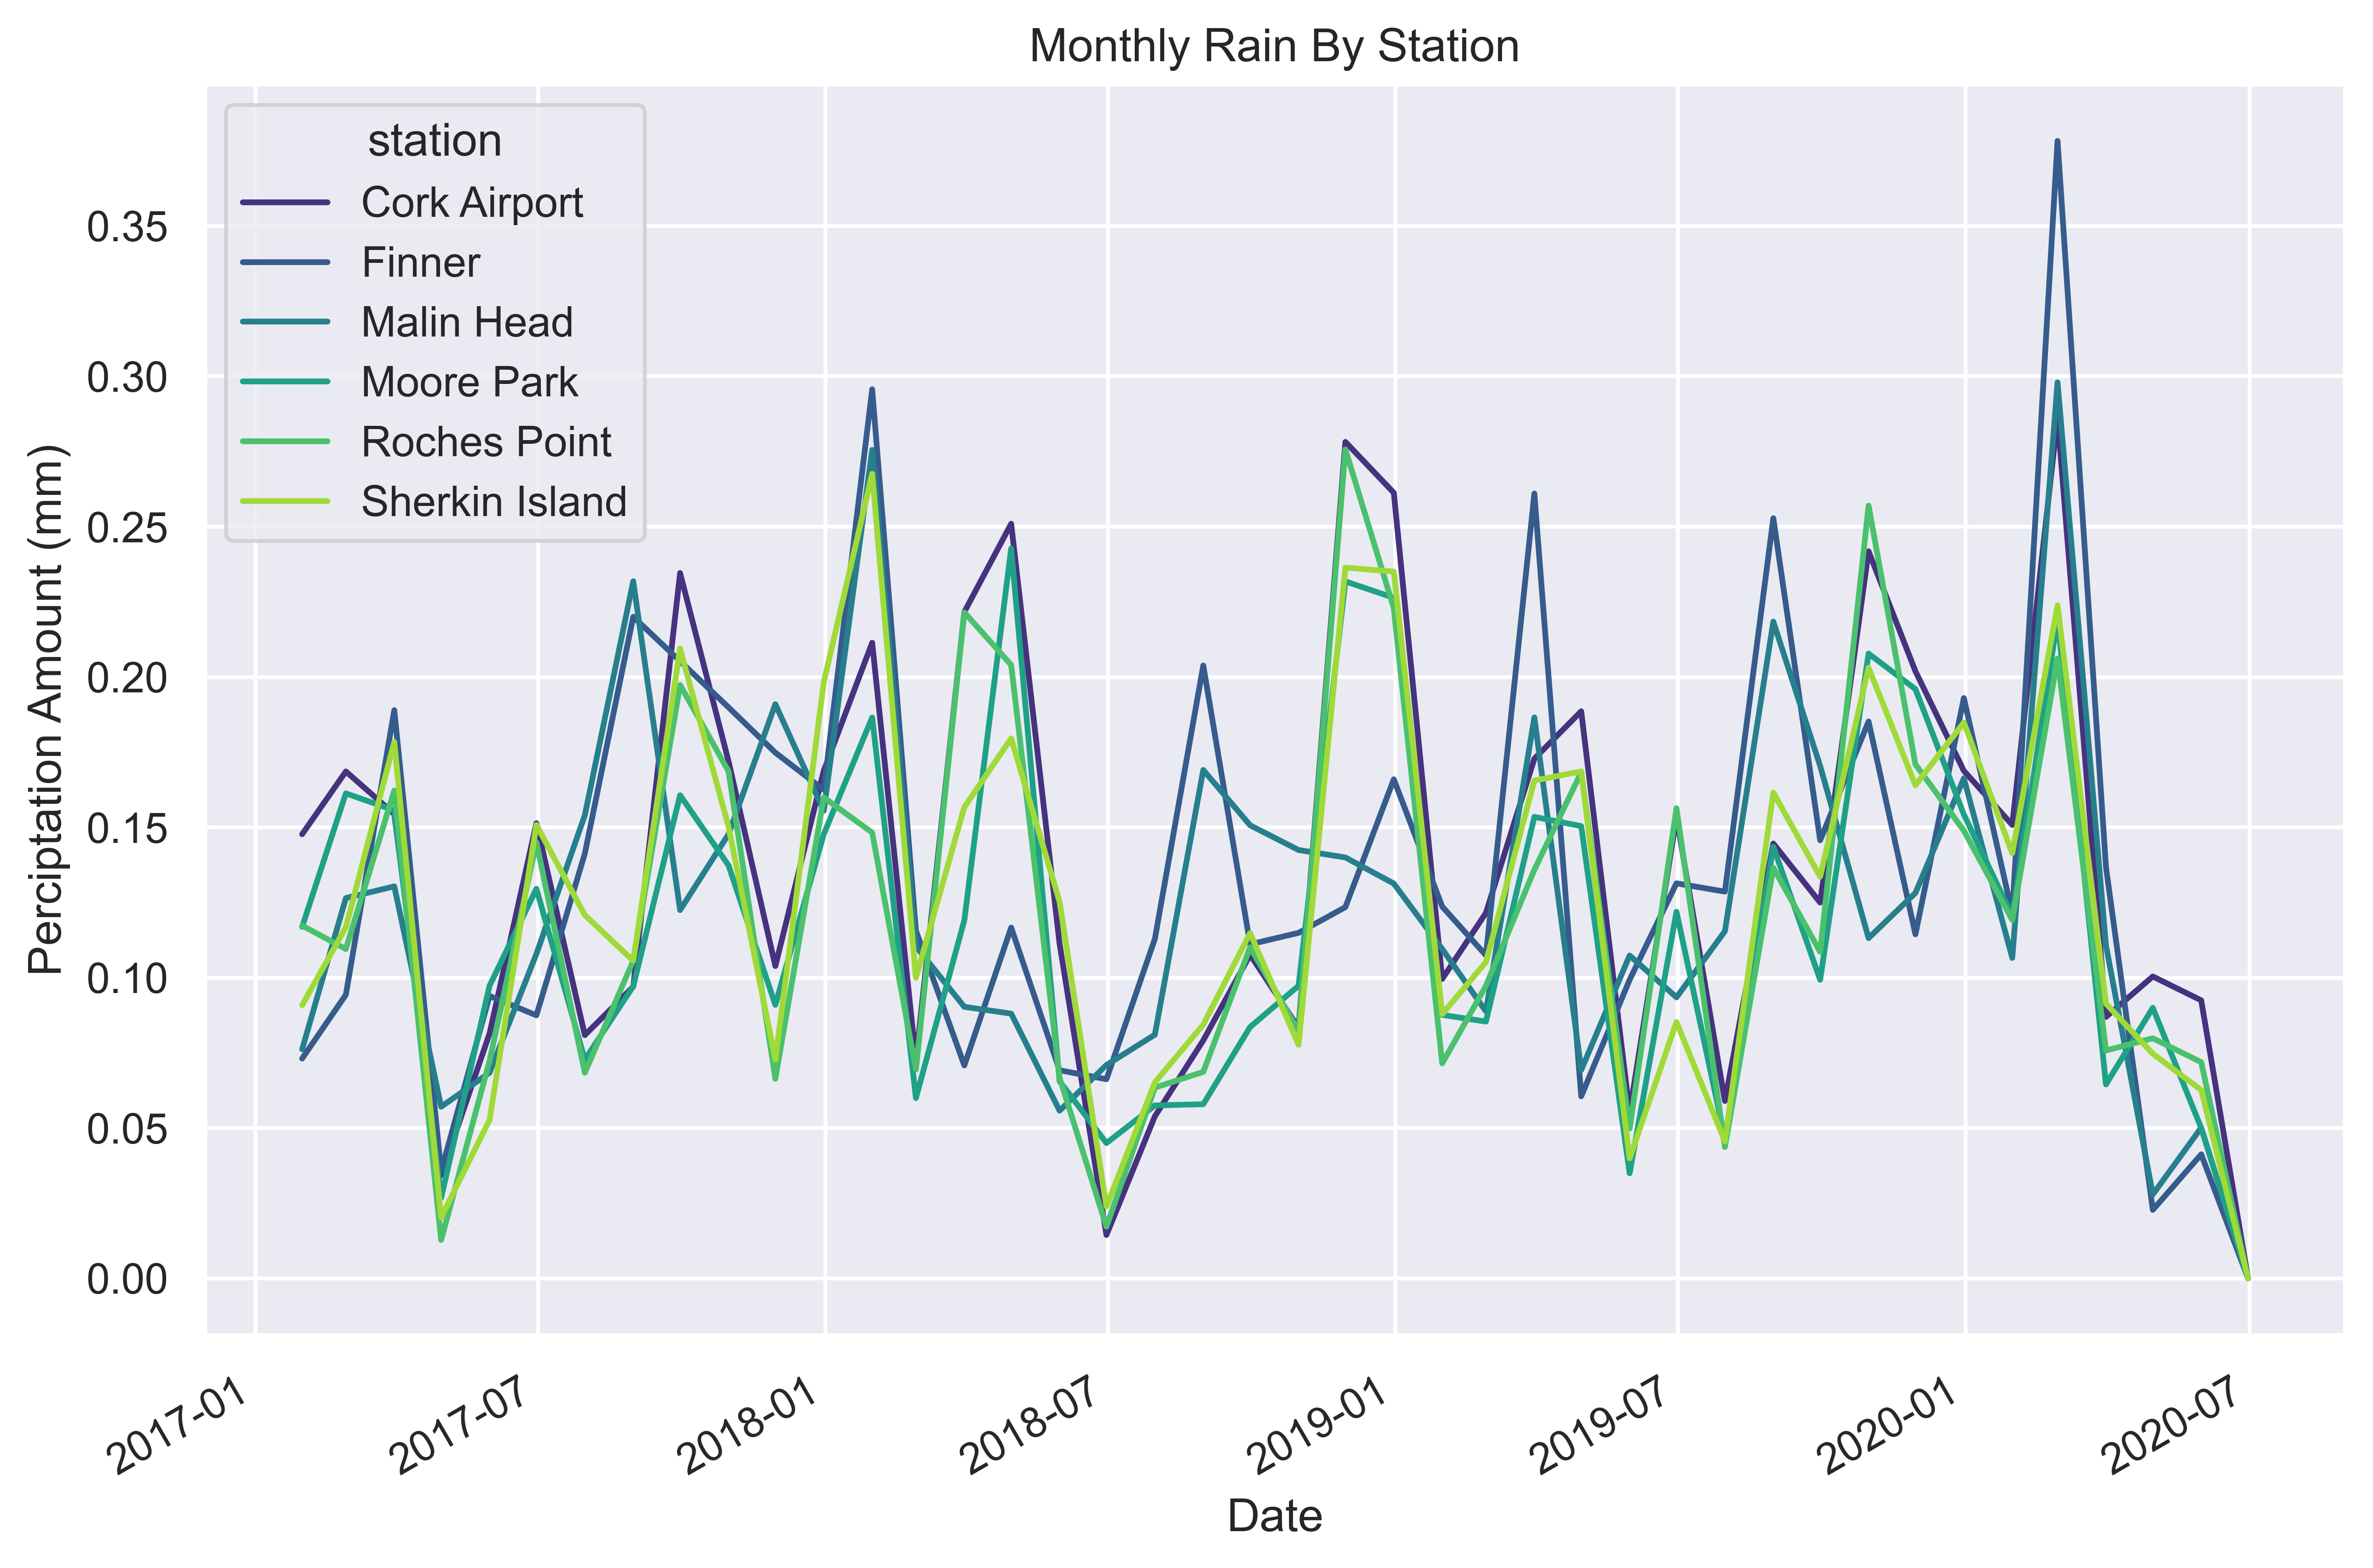

In [44]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
counties = ['Donegal', 'Cork']
g = (data.query('county in @counties')
    .groupby('station')['rain']
    .resample('M')
    .mean()
    .reset_index()
    .pipe(lambda d: sns.lineplot(data=d, x='date', y='rain', hue='station',
                                 ax=ax, palette='viridis')))
plt.title("Monthly Rain By Station")
plt.xlabel(xlabel='Date')
plt.ylabel(ylabel='Perciptation Amount (mm)')
g.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment = 'right')

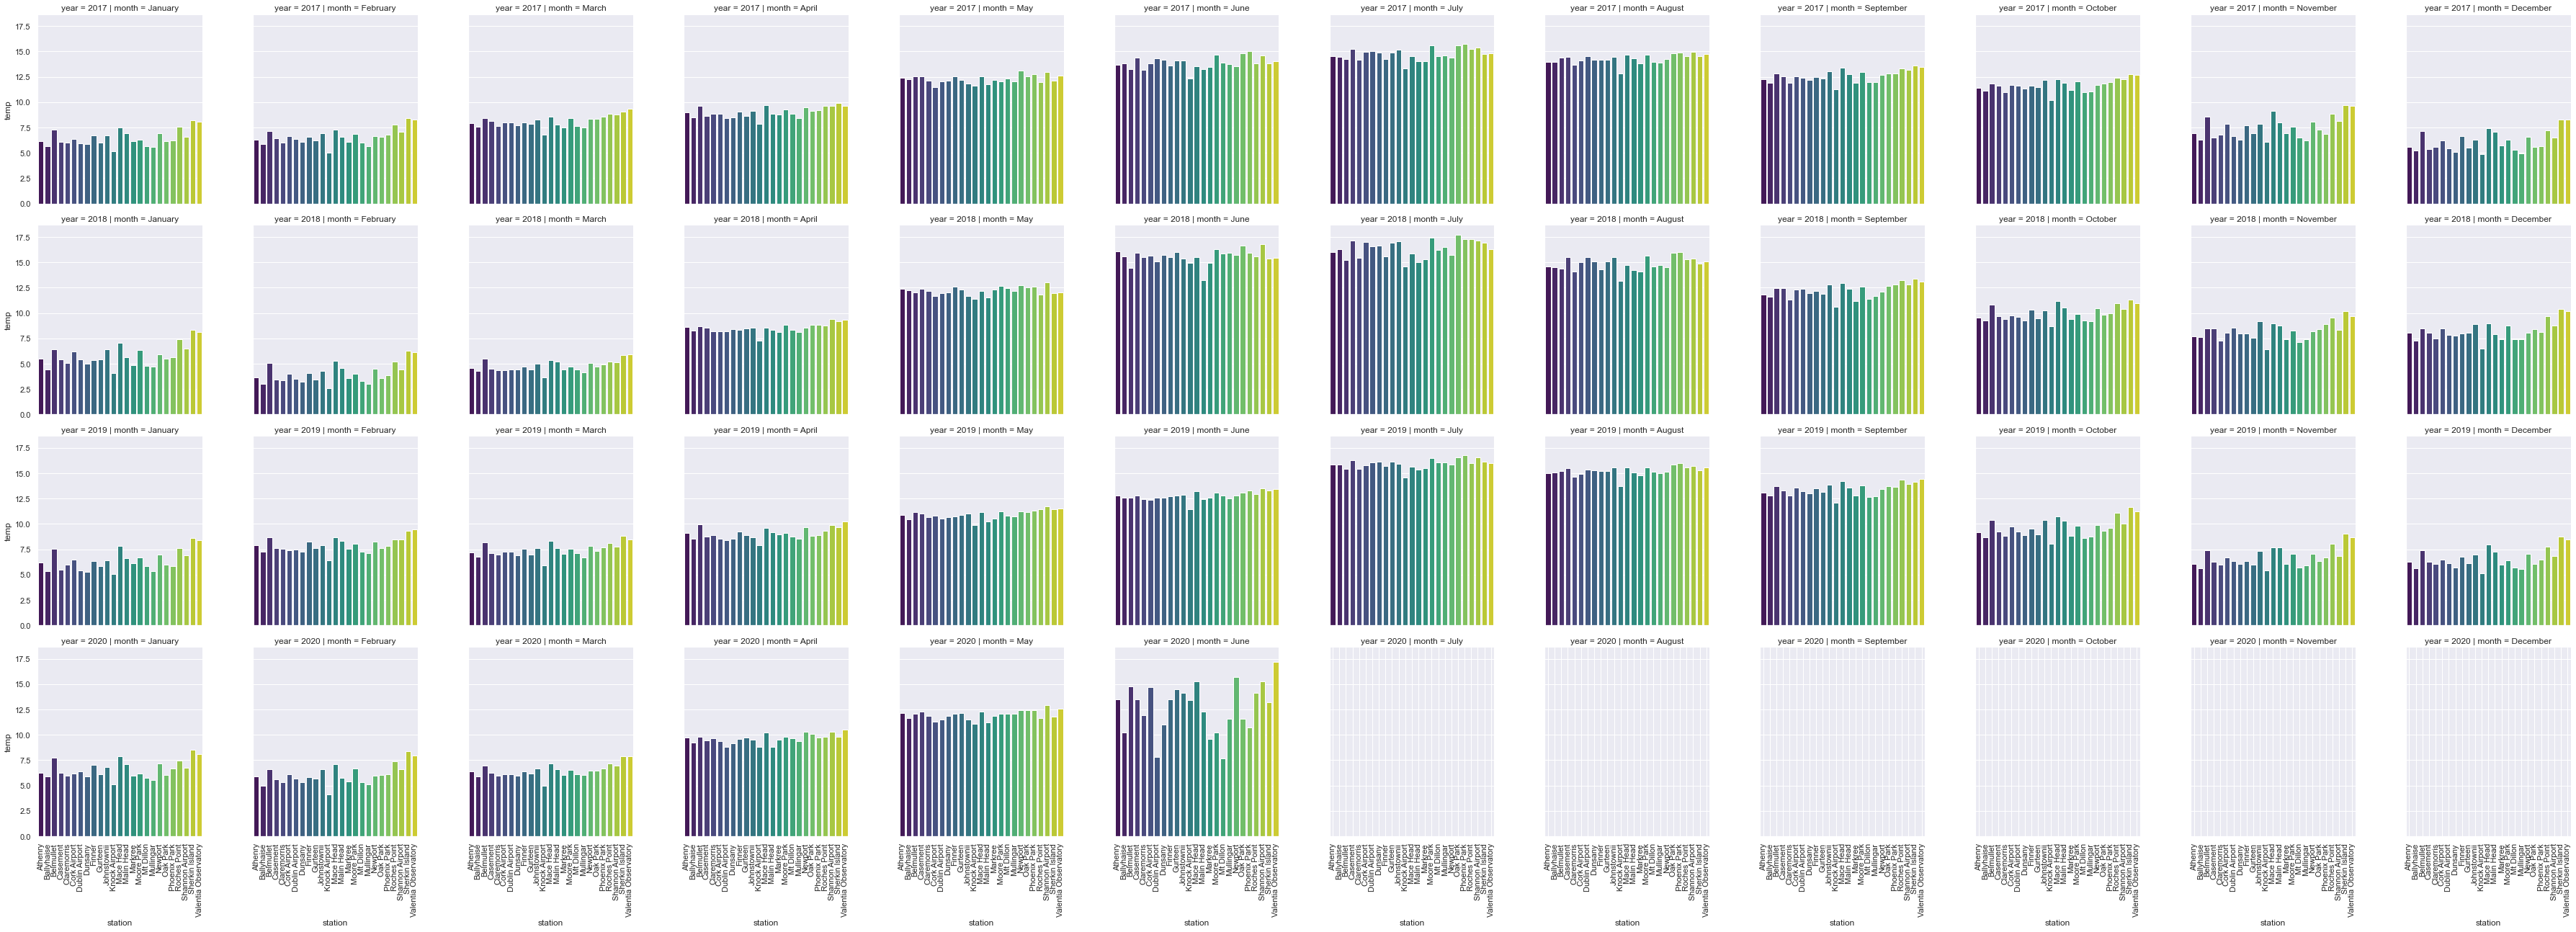

In [19]:
df = (data
    .groupby(['station', 'month', 'year'])['temp']
    .mean()
    .reset_index())

g = sns.FacetGrid(df, col='month', row='year', col_order=months, height=4.2)
g = g.map(sns.barplot, 'station', 'temp', palette='viridis', ci=None, order=sorted(df['station'].unique()))
g.set_xticklabels(sorted(df['station'].unique()))
for ax in g.axes.flat[-12:]:
    _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [20]:
def plot_facet_barplot(df: pd.DataFrame, feature: str, start_month: str, by: str = 'station', by_month: bool = True) -> None:
    """
    Function to plot facet barplot for particular feature. 
    Variables:
    df - Dataframe with weather data
    feature - Feature to plot barplot for 
    start_month - Starting month to consider for facet grid
    by - String to facet by station or county
    by_month - Boolean to set whether to facet by month or by year 
    """
    assert by in ['station', 'county'], "by variable must take value 'station' or 'county'"

    start_month = datetime.strptime(start_month, '%Y-%m')
    end_month = start_month + relativedelta(months=11) if start_month < datetime.strptime('2019-06', '%Y-%m') else datetime.strptime('2020-06', '%Y-%m')
    print(end_month)
    df = (df
          .sort_index()
          .loc[start_month:end_month]
          .groupby([by, 'year_month'])[feature]
          .mean()
          .reset_index())

    g = sns.FacetGrid(df, col='year_month', col_wrap=4, height=4.2)
    g = g.map(sns.barplot, by, feature, palette='viridis',
              ci=None, order=sorted(df[by].unique()))
    g.set_xticklabels(sorted(df[by].unique()))
    for ax in g.axes.flat[-4:]:
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


2018-12-01 00:00:00


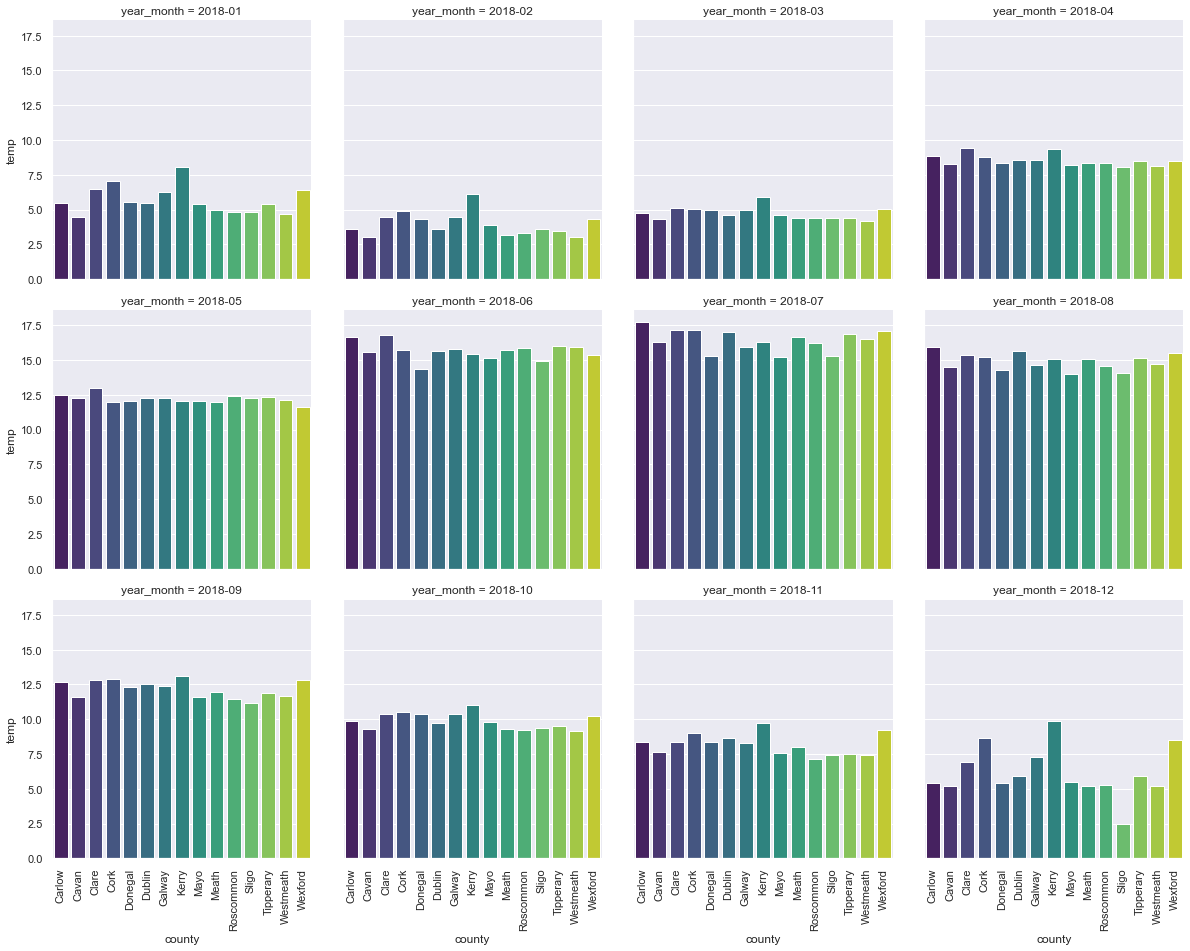

In [21]:
plot_facet_barplot(data, feature='temp', start_month='2018-01', by='county')

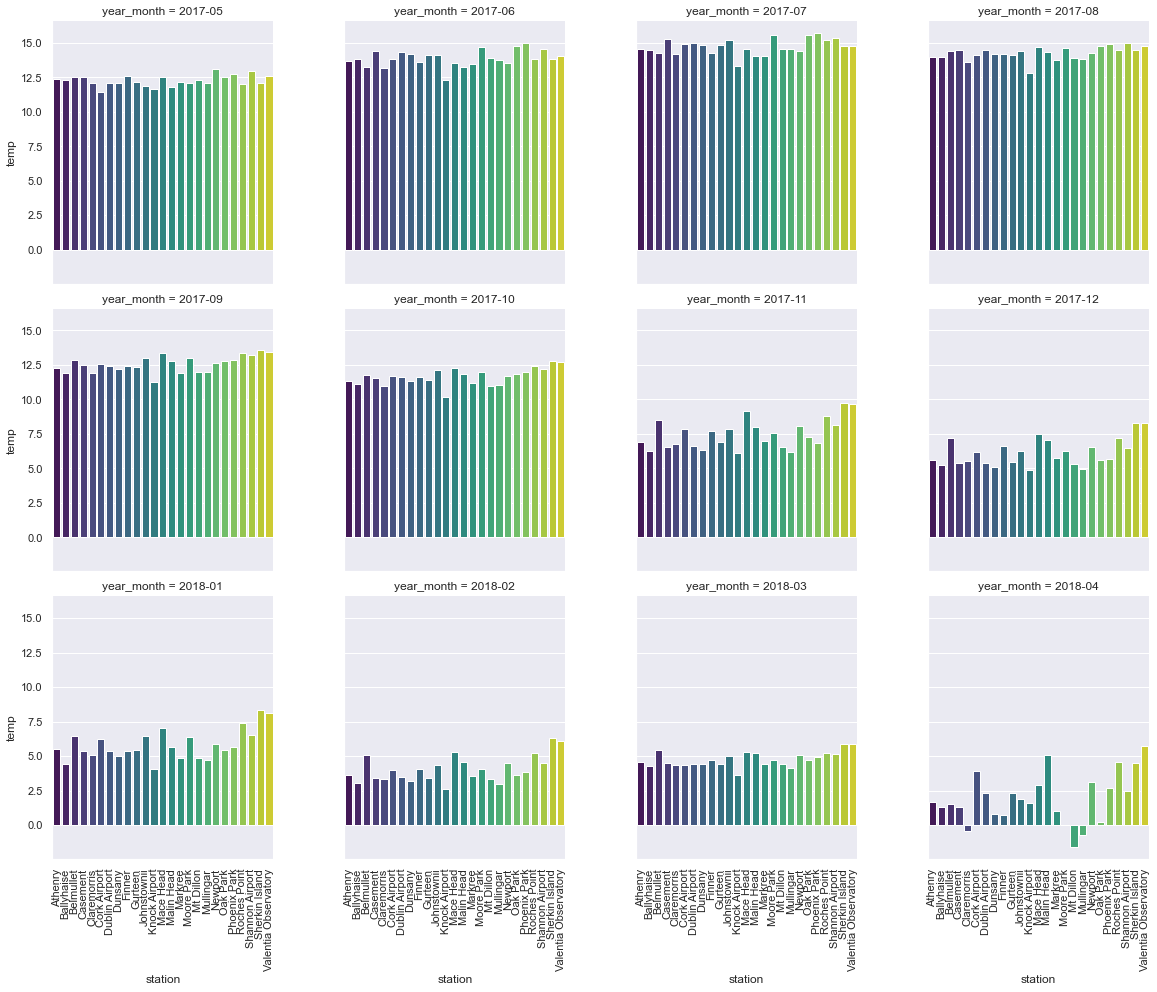

In [22]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

start_month = '2017-05'
start_month = datetime.strptime(start_month, '%Y-%m')
end_month = start_month + relativedelta(months=11)

test = (data.sort_index()
          .loc[start_month:end_month]
          .groupby(['station', 'year_month'])['temp']
          .mean()
          .reset_index())

g = sns.FacetGrid(test, col='year_month',
                  col_wrap=4, height=4.2)
g = g.map(sns.barplot, 'station', 'temp', palette='viridis',
              ci=None, order=sorted(df['station'].unique()))
g.set_xticklabels(sorted(df['station'].unique()))
for ax in g.axes.flat[-4:]:
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


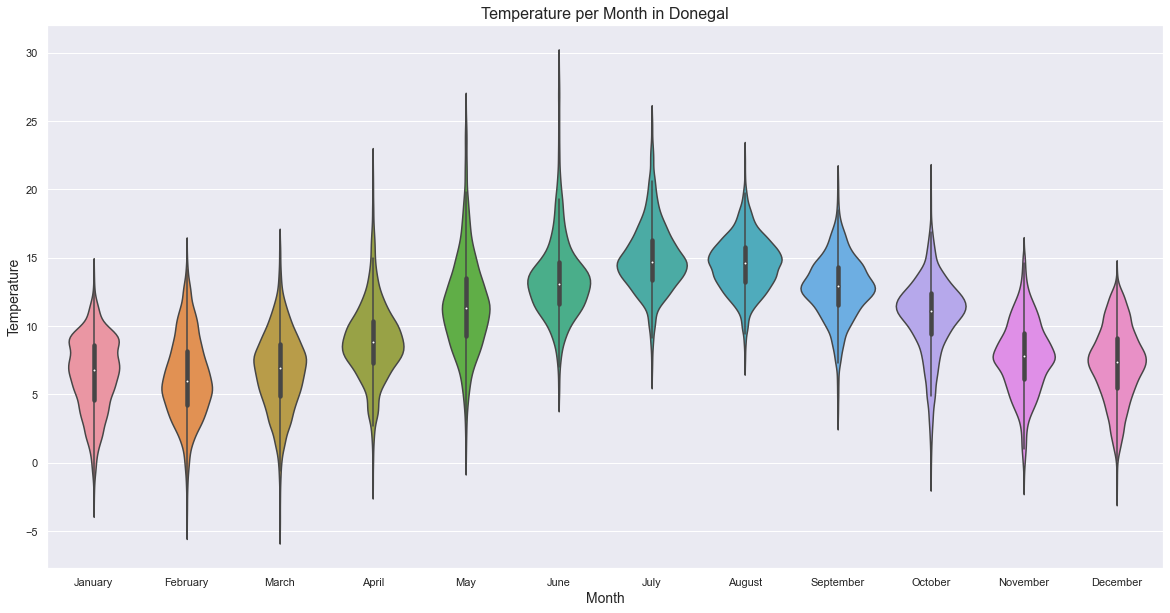

In [45]:
# Plot boxplot for distributions for month for county
county = 'Donegal'
box = True
fig, ax = plt.subplots(1, 1, figsize=(20,10))
df = data.query('county == @county')

if box:
    sns.boxplot(df, x='month', y='temp', ax=ax)
else:
    sns.violinplot(df, x='month', y='temp', ax=ax)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.title(f'Temperature per Month in {county}', fontsize=16);

### Radar Chart

In [70]:
df = (data.set_index('county')
      [['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir']])
     

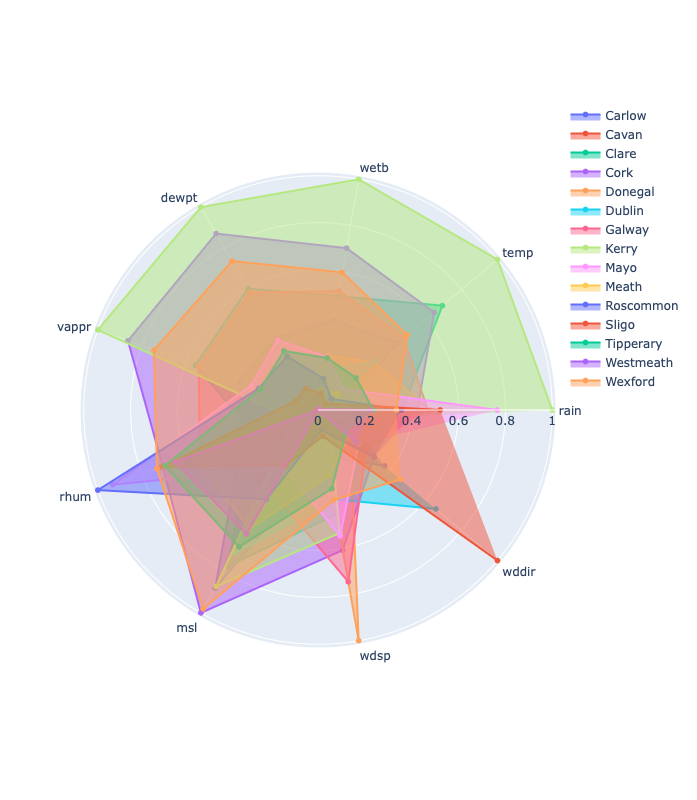

In [77]:
import plotly.graph_objects as go

categories = df.columns

layout = go.Layout(autosize=False,
                   width=800,
                   height=800)

fig = go.Figure(layout=layout)

df = (df.sub(df.min())
        .div(df.max() - df.min())
        .reset_index()
        .groupby('county')
        .mean()
)



for county in df.index:
    fig.add_trace(go.Scatterpolar(
        r=df.query('county == @county').values[0],
        theta=categories,
        fill='toself',
        name=county))

fig.show()
    
    


### Geomap 

In [91]:
data.head()

,station,county,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,date,month,year,year_month
date,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,Athenry,Galway,53.289001,-8.786,0.0,5.2,4.5,3.6,7.9,89.0,1021.900024,8.0,320.0,1,January,2017,2017-01
2017-01-01 01:00:00,Athenry,Galway,53.289001,-8.786,0.0,4.7,4.1,3.1,7.6,89.0,1022.000000,9.0,320.0,1,January,2017,2017-01
2017-01-01 02:00:00,Athenry,Galway,53.289001,-8.786,0.0,4.2,3.6,2.7,7.4,90.0,1022.099976,8.0,320.0,1,January,2017,2017-01
2017-01-01 03:00:00,Athenry,Galway,53.289001,-8.786,0.1,3.5,2.8,1.6,6.9,87.0,1022.500000,9.0,330.0,1,January,2017,2017-01
2017-01-01 04:00:00,Athenry,Galway,53.289001,-8.786,0.1,3.2,2.6,1.6,6.8,89.0,1022.700012,8.0,330.0,1,January,2017,2017-01


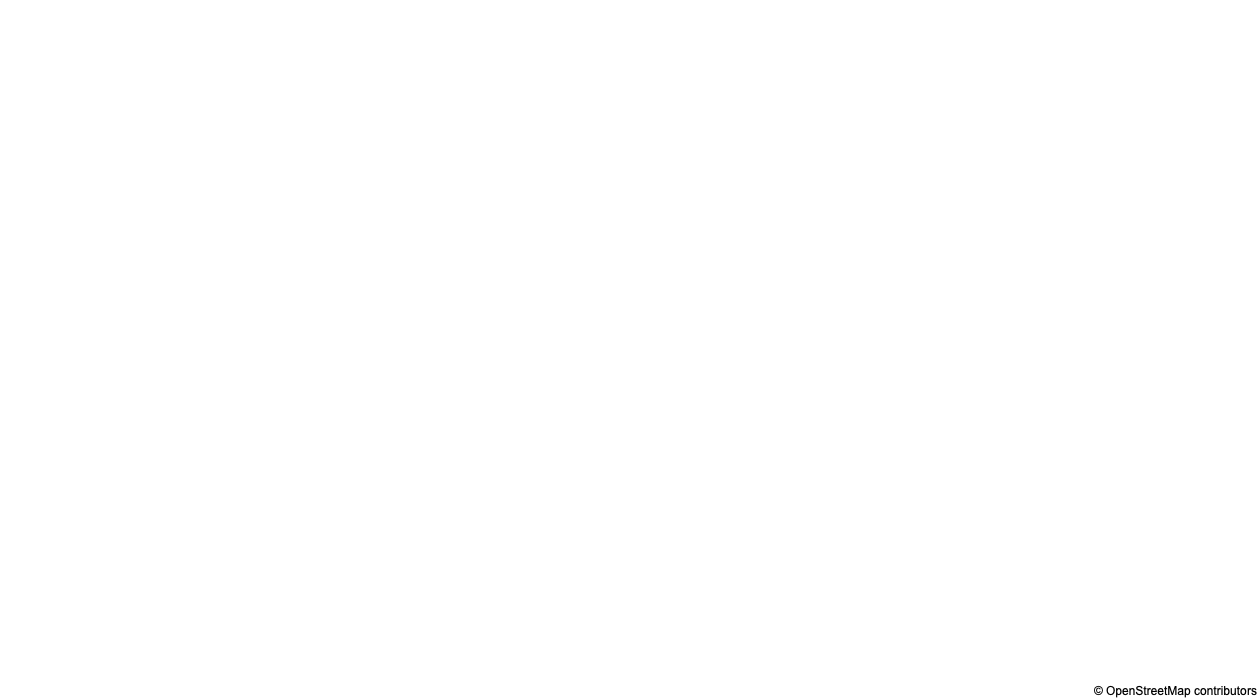

In [107]:
import plotly.express as px 

date=1
month='January'
year=2017

df = (data.query('date == @date and month == @month and year == @year'))

fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', hover_name='station',
                        hover_data=['rain', 'temp', 'wdsp', 'rhum'],
                        color_discrete_sequence=['blue'], zoom=6, height=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()